In [3]:
import pandas as pd

In [4]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'aa11bdee-ebca-4634-884d-30b48eeeb517',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)
    

{'status': {'timestamp': '2024-06-30T11:42:17.986Z', 'error_code': 0, 'error_message': None, 'elapsed': 35, 'credit_count': 1, 'notice': None, 'total_count': 10113}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11335, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

In [30]:
import pandas as pd
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [5]:
#This normalizes the data and makes it all pretty in a dataframe
df=pd.json_normalize(data['data'])
df['timestamp']=pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,...,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11335,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.971866e+07,1.971866e+07,...,53.4611,1.290383e+12,None,2024-06-30T11:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-30 17:12:12.771450
1,1027,Ethereum,ETH,ethereum,9108,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201871e+08,1.201871e+08,...,17.9543,4.069254e+11,None,2024-06-30T11:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-30 17:12:12.771450
2,825,Tether USDt,USDT,tether,90425,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.129115e+11,1.160769e+11,...,4.9718,1.158414e+11,None,2024-06-30T11:40:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-06-30 17:12:12.771450
3,1839,BNB,BNB,bnb,2188,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.475832e+08,1.475832e+08,...,3.7409,8.478463e+10,None,2024-06-30T11:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-30 17:12:12.771450
4,5426,Solana,SOL,solana,695,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.625138e+08,5.792300e+08,...,2.8747,8.159445e+10,None,2024-06-30T11:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-30 17:12:12.771450
5,3408,USDC,USDC,usd-coin,20456,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.228070e+10,3.228070e+10,...,1.4241,3.227715e+10,None,2024-06-30T11:40:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-06-30 17:12:12.771450
6,52,XRP,XRP,xrp,1345,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.568833e+10,9.998749e+10,...,1.1599,4.720694e+10,None,2024-06-30T11:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-30 17:12:12.771450
7,11419,Toncoin,TON,toncoin,443,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2.459963e+09,5.108319e+09,...,0.8315,3.913603e+10,None,2024-06-30T11:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-30 17:12:12.771450
8,74,Dogecoin,DOGE,dogecoin,1015,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.449216e+11,1.449216e+11,...,0.7813,1.770812e+10,None,2024-06-30T11:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-30 17:12:12.771450
9,2010,Cardano,ADA,cardano,1203,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.575209e+10,3.700777e+10,...,0.6073,1.732531e+10,None,2024-06-30T11:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-30 17:12:12.771450


In [6]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'aa11bdee-ebca-4634-884d-30b48eeeb517',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    df =pd.json_normalize(data['data'])
    df['timestamp'] =pd.to_datetime('now')
    df

    if not os.path.isfile(r'C:\Users\saror\Downloads\XLSX Worksheet\CryptoAPI.csv'):
        df.to_csv(r'C:\Users\saror\Downloads\XLSX Worksheet\CryptoAPI.csv',header='column_names')
    else:
        df.to_csv(r'C:\Users\saror\Downloads\XLSX Worksheet\CryptoAPI.csv',mode='a',header=False)

In [7]:
import os
from time import time
from time import sleep

for i in range(333): #333 is the limit per day in cryptoAPI
    api_runner()
    print('API Runner Completed Successfully')
    sleep(60) #sleep for 1 minute
exit()

API Runner Completed Successfully
API Runner Completed Successfully
API Runner Completed Successfully


KeyboardInterrupt: 

In [8]:
df3=pd.read_csv(r'C:\Users\saror\Downloads\XLSX Worksheet\CryptoAPI.csv')
df3

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,...,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11335,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.0,1.971863e+07,...,53.4381,1.278462e+12,NaN,2024-06-30T06:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-30 12:25:17.181566
1,1,1027,Ethereum,ETH,ethereum,9107,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.201870e+08,...,18.0300,4.050321e+11,NaN,2024-06-30T06:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-30 12:25:17.181566
2,2,825,Tether USDt,USDT,tether,90417,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,1.129115e+11,...,5.0182,1.158915e+11,NaN,2024-06-30T06:53:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-06-30 12:25:17.181566
3,3,1839,BNB,BNB,bnb,2188,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.475832e+08,...,3.7551,8.435681e+10,NaN,2024-06-30T06:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-30 12:25:17.181566
4,4,5426,Solana,SOL,solana,695,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.625150e+08,...,2.8493,8.015996e+10,NaN,2024-06-30T06:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-30 12:25:17.181566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,10,5805,Avalanche,AVAX,avalanche,750,2020-07-13T00:00:00.000Z,"['defi', 'smart-contracts', 'three-arrows-capi...",715748719.0,3.941007e+08,...,0.4932,2.029997e+10,NaN,2024-06-30T11:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-30 17:12:51.235415
86,11,1958,TRON,TRX,tron,997,2017-09-13T00:00:00.000Z,"['media', 'payments', 'tron-ecosystem', 'layer...",NaN,8.720194e+10,...,0.4815,1.091188e+10,NaN,2024-06-30T11:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-30 17:12:51.235415
87,12,5994,Shiba Inu,SHIB,shiba-inu,840,2020-08-01T00:00:00.000Z,"['memes', 'ethereum-ecosystem', 'doggone-dogge...",NaN,5.892712e+14,...,0.4412,1.000323e+10,NaN,2024-06-30T11:40:00.000Z,1027.0,Ethereum,ETH,ethereum,0x95ad61b0a150d79219dcf64e1e6cc01f0b64c4ce,2024-06-30 17:12:51.235415
88,13,6636,Polkadot,DOT,polkadot-new,788,2020-08-19T00:00:00.000Z,"['substrate', 'polkadot', 'binance-chain', 'po...",NaN,1.437953e+09,...,0.3879,8.791499e+09,NaN,2024-06-30T11:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-30 17:12:51.235415


In [11]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
df.columns

Index(['id', 'name', 'symbol', 'slug', 'num_market_pairs', 'date_added',
       'tags', 'max_supply', 'circulating_supply', 'total_supply',
       'infinite_supply', 'platform', 'cmc_rank',
       'self_reported_circulating_supply', 'self_reported_market_cap',
       'tvl_ratio', 'last_updated', 'quote.USD.price', 'quote.USD.volume_24h',
       'quote.USD.volume_change_24h', 'quote.USD.percent_change_1h',
       'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d',
       'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d',
       'quote.USD.percent_change_90d', 'quote.USD.market_cap',
       'quote.USD.market_cap_dominance', 'quote.USD.fully_diluted_market_cap',
       'quote.USD.tvl', 'quote.USD.last_updated', 'platform.id',
       'platform.name', 'platform.symbol', 'platform.slug',
       'platform.token_address', 'timestamp'],
      dtype='object')

In [14]:
pd.set_option('display.float_format',lambda x:'%.5f' % x)
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11335,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19718662.00000,19718662.00000,False,NaN,1,NaN,NaN,None,2024-06-30T11:41:00.000Z,61446.80649,13326884314.14013,-39.92400,-0.01467,0.57878,-4.41306,-10.14455,6.90406,-11.60221,1211648808084.10181,53.46110,1290382936213.72998,None,2024-06-30T11:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-30 17:12:51.235415
1,1027,Ethereum,ETH,ethereum,9108,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120187117.99203,120187117.99203,True,NaN,2,NaN,NaN,None,2024-06-30T11:40:00.000Z,3385.76578,6970431937.35062,-37.77800,0.08543,-0.40321,-3.14674,-11.05481,17.53210,-4.45674,406925431703.83075,17.95430,406925431703.83002,None,2024-06-30T11:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-30 17:12:51.235415
2,825,Tether USDt,USDT,tether,90425,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,112911493076.31609,116076856617.67273,True,NaN,3,NaN,NaN,None,2024-06-30T11:40:00.000Z,0.99797,29337300856.39886,-32.21190,-0.01130,-0.04193,-0.13922,-0.14947,-0.08727,-0.27517,112682482031.06511,4.97180,115841425471.21001,None,2024-06-30T11:40:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-06-30 17:12:51.235415
3,1839,BNB,BNB,bnb,2188,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,147583218.47863,147583218.47863,False,NaN,4,NaN,NaN,None,2024-06-30T11:40:00.000Z,574.48693,1399035472.48769,-10.55220,0.01982,0.30029,-2.49316,-3.44849,5.00137,-1.92098,84784629476.89668,3.74090,84784629476.89999,None,2024-06-30T11:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-30 17:12:51.235415
4,5426,Solana,SOL,solana,695,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,462513805.27529,579229964.16039,True,NaN,5,NaN,NaN,None,2024-06-30T11:40:00.000Z,140.86710,1223511855.53624,-41.91480,0.33560,-1.09242,5.29733,-16.33940,15.93552,-28.07137,65152980033.31094,2.87470,81594447255.85001,None,2024-06-30T11:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-30 17:12:51.235415
5,3408,USDC,USDC,usd-coin,20456,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,32280700307.48222,32280700307.48222,False,NaN,6,NaN,NaN,None,2024-06-30T11:40:00.000Z,0.99989,2769551173.30114,-44.00820,-0.00649,-0.00036,-0.00696,-0.01429,-0.00725,-0.04569,32277148801.01596,1.42410,32277148801.02000,None,2024-06-30T11:40:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-06-30 17:12:51.235415
6,52,XRP,XRP,xrp,1345,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,55688327582.00000,99987490594.00000,False,NaN,7,NaN,NaN,None,2024-06-30T11:41:00.000Z,0.47207,430055339.01331,-36.38520,-0.25838,-0.80101,-2.79416,-9.48029,-4.08195,-22.64408,26288756727.15512,1.15990,47206942403.59000,None,2024-06-30T11:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-30 17:12:51.235415
7,11419,Toncoin,TON,toncoin,443,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2459962618.87154,5108319144.04719,True,NaN,8,3414166606.00000,26156731653.28265,None,2024-06-30T11:40:00.000Z,7.66123,153577764.76267,-24.86840,-0.56008,1.12307,0.58127,19.39976,62.50864,42.07294,18846350961.85736,0.83150,39136031854.85000,

In [16]:
df4=df.groupby('name',sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d',
       'quote.USD.percent_change_90d']].mean()
df4

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.01467,0.57878,-4.41306,-10.14455,6.90406,-11.60221
Ethereum,0.08543,-0.40321,-3.14674,-11.05481,17.53210,-4.45674
Tether USDt,-0.01130,-0.04193,-0.13922,-0.14947,-0.08727,-0.27517
BNB,0.01982,0.30029,-2.49316,-3.44849,5.00137,-1.92098
Solana,0.33560,-1.09242,5.29733,-16.33940,15.93552,-28.07137
USDC,-0.00649,-0.00036,-0.00696,-0.01429,-0.00725,-0.04569
XRP,-0.25838,-0.80101,-2.79416,-9.48029,-4.08195,-22.64408
Toncoin,-0.56008,1.12307,0.58127,19.39976,62.50864,42.07294
Dogecoin,-0.09675,-1.50173,-1.83736,-24.08672,-1.58765,-40.51811


In [18]:
df5=df4.stack()
df5

name                                     
Bitcoin      quote.USD.percent_change_1h     -0.01467
             quote.USD.percent_change_24h     0.57878
             quote.USD.percent_change_7d     -4.41306
             quote.USD.percent_change_30d   -10.14455
             quote.USD.percent_change_60d     6.90406
             quote.USD.percent_change_90d   -11.60221
Ethereum     quote.USD.percent_change_1h      0.08543
             quote.USD.percent_change_24h    -0.40321
             quote.USD.percent_change_7d     -3.14674
             quote.USD.percent_change_30d   -11.05481
             quote.USD.percent_change_60d    17.53210
             quote.USD.percent_change_90d    -4.45674
Tether USDt  quote.USD.percent_change_1h     -0.01130
             quote.USD.percent_change_24h    -0.04193
             quote.USD.percent_change_7d     -0.13922
             quote.USD.percent_change_30d    -0.14947
             quote.USD.percent_change_60d    -0.08727
             quote.USD.percent_change_90

In [19]:
type(df5)

pandas.core.series.Series

In [64]:
df6=df5.to_frame(name='Values')
df6

Values
name                                              
Bitcoin     quote.USD.percent_change_1h   -0.01467
            quote.USD.percent_change_24h   0.57878
            quote.USD.percent_change_7d   -4.41306
            quote.USD.percent_change_30d -10.14455
            quote.USD.percent_change_60d   6.90406
            quote.USD.percent_change_90d -11.60221
Ethereum    quote.USD.percent_change_1h    0.08543
            quote.USD.percent_change_24h  -0.40321
            quote.USD.percent_change_7d   -3.14674
            quote.USD.percent_change_30d -11.05481
            quote.USD.percent_change_60d  17.53210
            quote.USD.percent_change_90d  -4.45674
Tether USDt quote.USD.percent_change_1h   -0.01130
            quote.USD.percent_change_24h  -0.04193
            quote.USD.percent_change_7d   -0.13922
            quote.USD.percent_change_30d  -0.14947
            quote.USD.percent_change_60d  -0.08727
            quote.USD.percent_change_90d  -0.27517
BNB         quote.USD.percent_change_1h    0.01982
            quote.USD.percent_change_24h   0.30029
            quote.USD.percent_change_7d   -2.49316
            quote.USD.percent_change_30d  -3.44849
            quote.USD.percent_change_60d   5.00137
            quote.USD.percent_change_90d  -1.92098
Solana      quote.USD.percent_change_1h    0.33560
            quote.USD.percent_change_24h  -1.09242
            quote.USD.percent_change_7d    5.29733
            quote.USD.percent_change_30d -16.33940
            quote.USD.percent_change_60d  15.93552
            quote.USD.percent_change_90d -28.07137
USDC        quote.USD.percent_change_1h   -0.00649
            quote.USD.percent_change_24h  -0.00036
            quote.USD.percent_change_7d   -0.00696
            quote.USD.percent_change_30d  -0.01429
            quote.USD.percent_change_60d  -0.00725
            quote.USD.percent_change_90d  -0.04569
XRP         quote.USD.percent_change_1h   -0.25838
            quote.USD.percent_change_24h  -0.80101
            quote.USD.percent_change_7d   -2.79416
            quote.USD.percent_change_30d  -9.48029
            quote.USD.percent_change_60d  -4.08195
            quote.USD.percent_change_90d -22.64408
Toncoin     quote.USD.percent_change_1h   -0.56008
            quote.USD.percent_change_24h   1.12307
            quote.USD.percent_change_7d    0.58127
            quote.USD.percent_change_30d  19.39976
            quote.USD.percent_change_60d  62.50864
            quote.USD.percent_change_90d  42.07294
Dogecoin    quote.USD.percent_change_1h   -0.09675
            quote.USD.percent_change_24h  -1.50173
            quote.USD.percent_change_7d   -1.83736
            quote.USD.percent_change_30d -24.08672
            quote.USD.percent_change_60d  -1.58765
            quote.USD.percent_change_90d -40.51811
Cardano     quote.USD.percent_change_1h   -0.08947
            quote.USD.percent_change_24h  -2.82221
            quote.USD.percent_change_7d   -0.85409
            quote.USD.percent_change_30d -14.56527
            quote.USD.percent_change_60d -10.78260
            quote.USD.percent_change_90d -38.90359
Avalanche   quote.USD.percent_change_1h   -0.18453
            quote.USD.percent_change_24h   1.01804
            quote.USD.percent_change_7d   11.97299
            quote.USD.percent_change_30d -21.75137
            quote.USD.percent_change_60d -10.13169
            quote.USD.percent_change_90d -46.26055
TRON        quote.USD.percent_change_1h    0.02659
            quote.USD.percent_change_24h   0.11965
            quote.USD.percent_change_7d    4.08235
            quote.USD.percent_change_30d  11.82950
            quote.USD.percent_change_60d   5.43067
            quote.USD.percent_change_90d   2.98795
Shiba Inu   quote.USD.percent_change_1h   -0.02217
            quote.USD.percent_change_24h  -0.90731
            quote.USD.percent_change_7d   -5.72677
            quote.USD.percent_change_30d -34.83603
            quote.USD.percent_change_60d -19.25863
            quo

In [65]:
df6.count()

Values    90
dtype: int64

In [66]:
index=pd.Index(range(90))
df6=df5.reset_index()
df6

,name,level_1,0
0,Bitcoin,quote.USD.percent_change_1h,-0.01467
1,Bitcoin,quote.USD.percent_change_24h,0.57878
2,Bitcoin,quote.USD.percent_change_7d,-4.41306
3,Bitcoin,quote.USD.percent_change_30d,-10.14455
4,Bitcoin,quote.USD.percent_change_60d,6.90406
5,Bitcoin,quote.USD.percent_change_90d,-11.60221
6,Ethereum,quote.USD.percent_change_1h,0.08543
7,Ethereum,quote.USD.percent_change_24h,-0.40321
8,Ethereum,quote.USD.percent_change_7d,-3.14674
9,Ethereum,quote.USD.percent_change_30d,-11.05481


In [67]:
df6=df6.rename(columns={'level_1':'percent_change',0:'Values'})
df6

,name,percent_change,Values
0,Bitcoin,quote.USD.percent_change_1h,-0.01467
1,Bitcoin,quote.USD.percent_change_24h,0.57878
2,Bitcoin,quote.USD.percent_change_7d,-4.41306
3,Bitcoin,quote.USD.percent_change_30d,-10.14455
4,Bitcoin,quote.USD.percent_change_60d,6.90406
5,Bitcoin,quote.USD.percent_change_90d,-11.60221
6,Ethereum,quote.USD.percent_change_1h,0.08543
7,Ethereum,quote.USD.percent_change_24h,-0.40321
8,Ethereum,quote.USD.percent_change_7d,-3.14674
9,Ethereum,quote.USD.percent_change_30d,-11.05481


In [69]:
df6['percent_change']=df6['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df6

,name,percent_change,Values
0,Bitcoin,1h,-0.01467
1,Bitcoin,24h,0.57878
2,Bitcoin,7d,-4.41306
3,Bitcoin,30d,-10.14455
4,Bitcoin,60d,6.90406
5,Bitcoin,90d,-11.60221
6,Ethereum,1h,0.08543
7,Ethereum,24h,-0.40321
8,Ethereum,7d,-3.14674
9,Ethereum,30d,-11.05481


In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

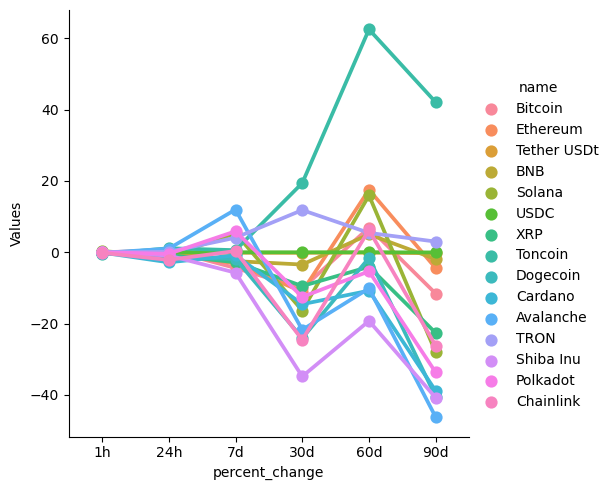

In [70]:
sns.catplot(x='percent_change',y='Values',hue='name',data=df6,kind='point')